# EXPERIMENT NO 2

In [ ]:
from keras.datasets import imdb
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Check the first review
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
# Check the first label
train_labels[0]

1

In [ ]:
# Since we restricted ourselves to the top 10000 frequent words, no word index 
#should exceed the maximum index
# we'll verify this below
# Here is a list of maximum indexes in every review, we search the maximum index in
print(type([max(sequence) for sequence in train_data]))
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [ ]:
# Let's quickly decode a review
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Step 3: decode the review, mapping integer indices to words
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
len(reverse_word_index)


88584

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
                                                    results = np.zeros((len(sequences), dimension)) 
                                                    for i,sequence in enumerate(sequences):
                                                                                            results[i,sequence] = 1
                                                    return results
# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Vectorize testing Data
X_test = vectorize_sequences(test_data)


In [ ]:
X_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
X_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
 loss = losses.binary_crossentropy,
 metrics = [metrics.binary_accuracy])

In [ ]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_X_train,
 partial_y_train,
epochs=20,
batch_size=512,
validation_data=(X_val, y_val))


Epoch 1/20
30/30 [==============================] - 4s 91ms/step - loss: 0.5211 - binary_accuracy: 0.7813 - val_loss: 0.3902 - val_binary_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.3083 - binary_accuracy: 0.9015 - val_loss: 0.3117 - val_binary_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2219 - binary_accuracy: 0.9264 - val_loss: 0.2790 - val_binary_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1740 - binary_accuracy: 0.9427 - val_loss: 0.3130 - val_binary_accuracy: 0.8738
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1425 - binary_accuracy: 0.9545 - val_loss: 0.2874 - val_binary_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1167 - binary_accuracy: 0.9635 - val_loss: 0.2957 - val_binary_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - los

In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

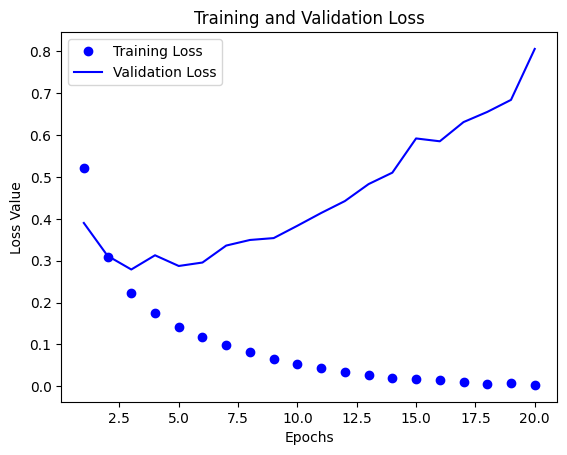

In [ ]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

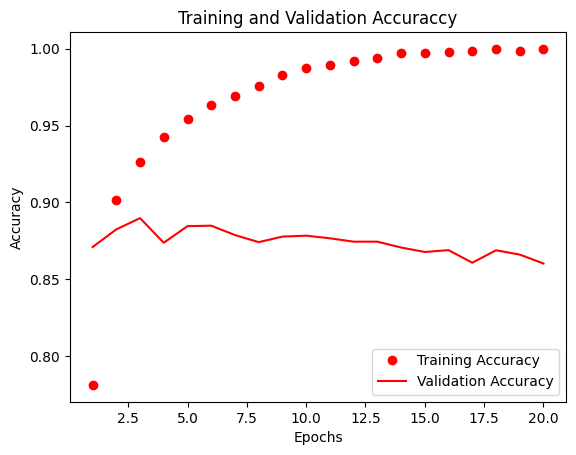

In [ ]:
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.fit(partial_X_train,
 partial_y_train,
epochs=3,
batch_size=512,
validation_data=(X_val, y_val))

Epoch 1/3
30/30 [==============================] - 3s 97ms/step - loss: 0.0057 - binary_accuracy: 0.9991 - val_loss: 0.7555 - val_binary_accuracy: 0.8636
Epoch 2/3
30/30 [==============================] - 1s 36ms/step - loss: 0.0019 - binary_accuracy: 1.0000 - val_loss: 0.7865 - val_binary_accuracy: 0.8629
Epoch 3/3
30/30 [==============================] - 2s 51ms/step - loss: 0.0051 - binary_accuracy: 0.9989 - val_loss: 0.8310 - val_binary_accuracy: 0.8638


In [ ]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)


782/782 [==============================] - 2s 2ms/step


In [ ]:
result


array([[0.00308311],
       [1.        ],
       [0.92569184],
       ...,
       [0.00120889],
       [0.01715435],
       [0.8749331 ]], dtype=float32)

In [ ]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
 y_pred[i] = 1 if score > 0.5 else 0

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)


In [ ]:
mae

0.15048